# Descriptive Statistics

**Author: Matshepo Lebese <br>**
**Date: 14 April 2023 <br>**
**Source:https://www.kaggle.com/datasets/adithyabshetty100/student-performance <br>**
**Github url: <br>**

In [125]:
%%html
<style>
table {float:left}
table style="background-color: blue;"
background-color: #00a0d2
</style>

In [73]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from scipy.stats import gmean
from scipy.stats import zscore
from scipy.stats import probplot
from scipy.stats import entropy
import statsmodels.api as sm
import statistics
from scipy.stats import mstats
from scipy.stats import kstest

StudentsPerformance = pd.read_csv("StudentsPerformance.csv")

# Data Cleaning

In [11]:
#Checking to see if the data has null values or not.
StudentsPerformance.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [12]:
StudentsPerformance.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


array([[<Axes: title={'center': 'math score'}>,
        <Axes: title={'center': 'reading score'}>],
       [<Axes: title={'center': 'writing score'}>, <Axes: >]],
      dtype=object)

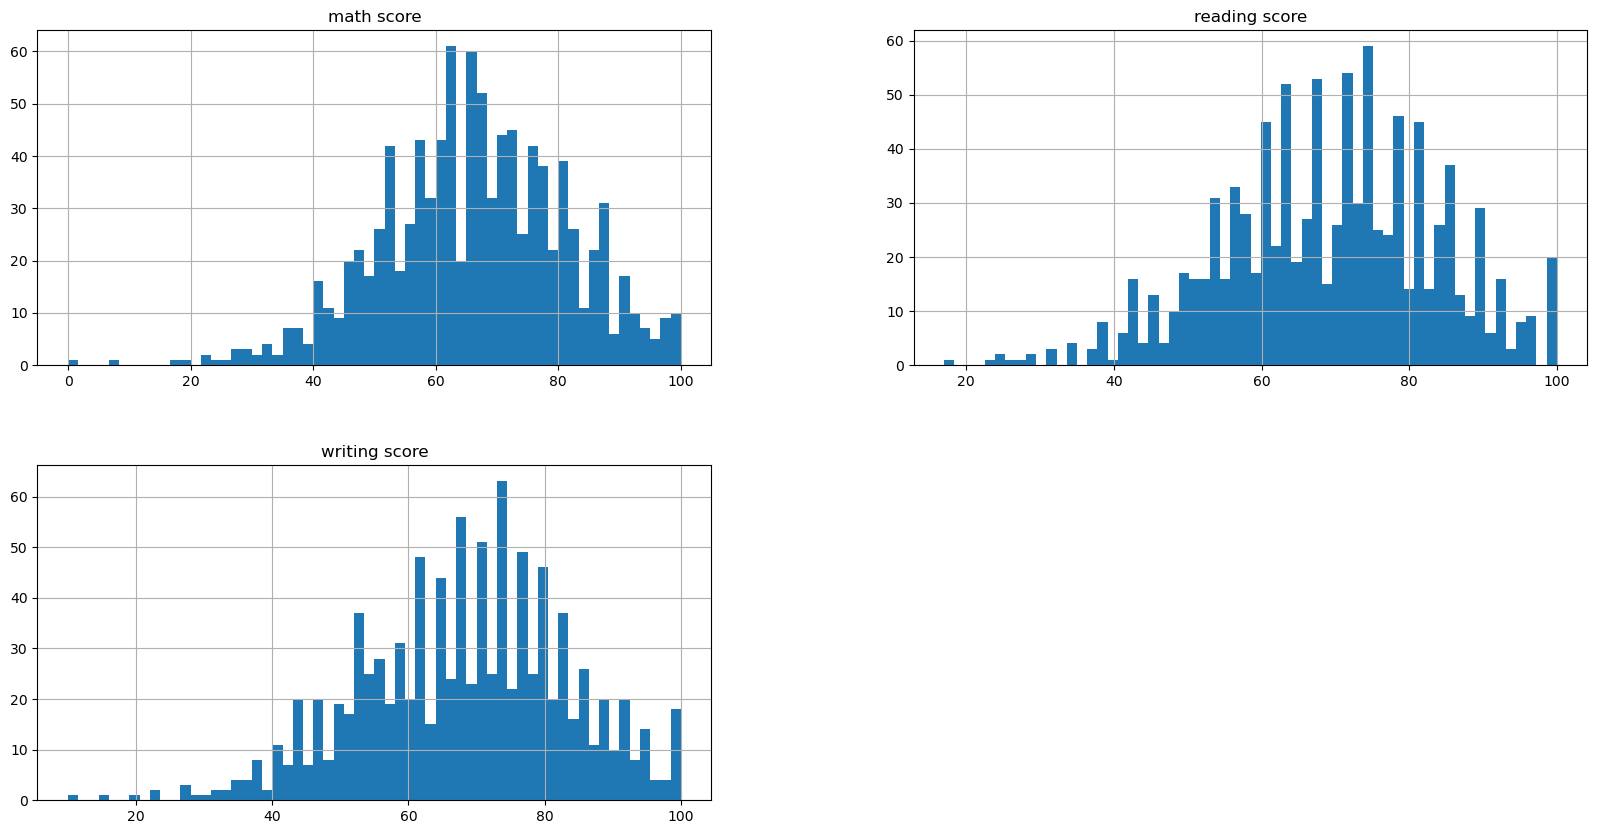

In [15]:
StudentsPerformance.hist(bins=60, figsize=(20,10))

In [16]:
# Checking to see all the columns available.
StudentsPerformance.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [17]:
# Checking to see if the datatypes are correct in respect of their columns.
StudentsPerformance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [23]:
# Checking to see if there are duplicates in the dataset.
duplicates = StudentsPerformance.duplicated()

In [24]:
duplicates.sum()

0

In [161]:
StudentsPerformance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Descriptive Statistics for male students

In [18]:
male_scores = StudentsPerformance.loc[StudentsPerformance['gender'] == 'male',['gender','math score', 'reading score', 'writing score']]
male_scores

,gender,math score,reading score,writing score
3,male,47,57,44
4,male,76,78,75
7,male,40,43,39
8,male,64,64,67
10,male,58,54,52
...,...,...,...,...
985,male,57,51,54
987,male,81,75,76
990,male,86,81,75
994,male,63,63,62


### Mean scores for the subjects

In [109]:
Male_mean = male_scores[['math score','reading score', 'writing score']].mean()
print("The mean for males is:", Male_mean)

The mean for males is: math score       68.728216
reading score    65.473029
writing score    63.311203
dtype: float64


|Score Type    | Mean Result |
|--------------|-------------|
|math score    | 68.728216   |
|reading score | 65.473029   |
|writing score | 63.311203   |

### Median scores for the subjects

In [108]:
Male_median = male_scores[['math score','reading score', 'writing score']].median()
print("The median for males is:", Male_median)

The median for males is: math score       69.0
reading score    66.0
writing score    64.0
dtype: float64


|Score Type    | Median Result |
|--------------|---------------|
|math score    | 69.0          |
|reading score | 66.0          |
|writing score | 64.0          |

### Mode for the subjects

In [107]:
male_scores[['math score','reading score', 'writing score']].mode()

,math score,reading score,writing score
0,62.0,66,68.0
1,NaN,74,NaN


### Weighted mean

In [24]:
weighted_mean = np.average(male_scores['math score'], weights= male_scores['writing score'])
print("Weighted mean:", weighted_mean)

Weighted mean: 71.57697601258356


### Geometric Mean

In [60]:
gmean(male_scores[['math score', 'reading score', 'writing score']])

array([67.11315972, 63.85543804, 61.57142061])

|Score Type   |Geometric mean|
|-------------|--------------|
|math score   |67.11315972   |
|reading score|63.85543804   |
|writing score|61.57142061   |

### Percentiles for the subjects

In [97]:
np.percentile(male_scores['math score'],[0,25,50,75,99])

array([27.  , 59.  , 69.  , 79.  , 98.19])

|Percentiles | Percentile_Outcome |
|----------- | ------------------ |
| P0         | 27 |
| P25        | 59 |
| P50        | 69 |
| P75        | 79 |
| P99        | 98.19|

In [60]:
np.percentile(male_scores['reading score'],[0,25,50,75,99])

array([23., 56., 66., 75., 96.])

|Percentiles | Percentile_Outcome |
|----------- | ------------------ |
| P0         | 23 |
| P25        | 56 |
| P50        | 66 |
| P75        | 75 |
| P99        | 96 |

In [61]:
np.percentile(male_scores['writing score'],[0,25,50,75,99])

array([15.  , 53.  , 64.  , 73.75, 92.  ])

|Percentiles | Percentile_Outcome |
|----------- | ------------------ |
| P0         | 15 |
| P25        | 53 |
| P50        | 64 |
| P75        | 73.75|
| P99        | 92 |

### Quartiles for the subjects

In [128]:
#male_scores['math score'].quantile(0.25)
male_scores['math score'].quantile(0.50)
#male_scores['math score'].quantile(0.75)
#male_scores['math score'].min()
#male_scores['math score'].max()



69.0

|Quartile    | Results |
|----------- | --------|
| Minimum    | 27      |
| P25        | 59      |
| P50        | 69      |
| P75        | 79      |
| Maximum    | 100     |

In [129]:
#male_scores['reading score'].quantile(0.25)
male_scores['reading score'].quantile(0.50)
#male_scores['reading score'].quantile(0.75)
#male_scores['reading score'].min()
#male_scores['reading score'].max()


66.0

|Quartile    | Results |
|----------- | --------|
| Minimum    | 23      |
| P25        | 56      |
| P50        | 66      |
| P75        | 75      |
| Maximum    | 100     |

In [130]:
#male_scores['writing score'].quantile(0.25)
male_scores['writing score'].quantile(0.50)
#male_scores['writing score'].quantile(0.75)
#male_scores['writing score'].min()
#male_scores['writing score'].max()


64.0

|Quartile    | Results    |
|----------- | -----------|
| Minimum    | 15         |
| P25        | 53         |
| P50        | 64         |
| P75        | 73.75      |
| Maximum    | 100        |

### Range for the different subjects

In [62]:
male_scores['math score'].max() - male_scores['math score'].min()

73

In [63]:
male_scores['reading score'].max() - male_scores['reading score'].min()

77

In [64]:
male_scores['writing score'].max() - male_scores['writing score'].min()

85

### Interquartile range

In [113]:
Q1 = male_scores['math score'].quantile(0.25)
Q3 = male_scores['math score'].quantile(0.75)
IQR = Q3 - Q1
print('Interquartile Range (IQR) for Math Scores:', IQR)

Interquartile Range (IQR) for Math Scores: 20.0


In [114]:
Q1 = male_scores['reading score'].quantile(0.25)
Q3 = male_scores['reading score'].quantile(0.75)
IQR = Q3 - Q1
print('Interquartile Range (IQR) for Math Scores:', IQR)

Interquartile Range (IQR) for Math Scores: 19.0


In [115]:
Q1 = male_scores['writing score'].quantile(0.25)
Q3 = male_scores['writing score'].quantile(0.75)
IQR = Q3 - Q1
print('Interquartile Range (IQR) for Math Scores:', IQR)

Interquartile Range (IQR) for Math Scores: 20.75


### Variance

In [104]:
#np.var(male_scores['math score'])
#np.var(male_scores['reading score'])
np.var(male_scores['writing score'])

198.7869699213167

|Score_type   | Variance result |
|----------   | ----------------|
|math score   |205.6750959866393|
|reading score|193.6932559701107|
|writing score|198.7869699213167|

### Standard Deviation

In [101]:
#np.std(male_scores['math score'])
#np.std(male_scores['reading score'])
np.std(male_scores['writing score'])

14.099183306891103

|Score_type   | Standard deviation result |
|----------   | ------------------------- |
|math score   | 14.34137706033278         |
|reading score| 13.91737245208702         |
|writing score| 14.099183306891103        |


### Coefficient of Variance

In [21]:

#np.std(male_scores['math score'])/ np.var(male_scores['math score'])*100
#np.std(male_scores['reading score'])/ np.var(male_scores['reading score'])*100
np.std(male_scores['writing score'])/ np.var(male_scores['writing score'])*100


7.092609396114746

|Score_Type   | Coefficient of variance |
|-------------|-------------------------|
|math score   |6.972831101177364
|reading score|7.185264340971504
|writing score|7.092609396114746

### Zscores

In [62]:
zscore(male_scores['math score'])

3     -1.515072
4      0.507049
7     -2.003170
8     -0.329690
10    -0.748060
         ...   
985   -0.817789
987    0.855691
990    1.204332
994   -0.399419
996   -0.469147
Name: math score, Length: 482, dtype: float64

|   | Zscores |
|---|---------|
|3  |-1.515072|
|4  |0.507049 | 
|7  |-2.003170|
|8  |-0.329690|
|10 |-0.748060|
|   |...      |
|985|-0.817789|
|987|0.855691 |
|990|1.204332 |
|994|-0.399419|
|996|-0.469147|

### Kurtosis

In [91]:
male_scores['math score'].kurtosis()

-0.36599255210444515

### Skewness

In [92]:
male_scores['math score'].skew()

-0.14527029651627058

## QQ plot

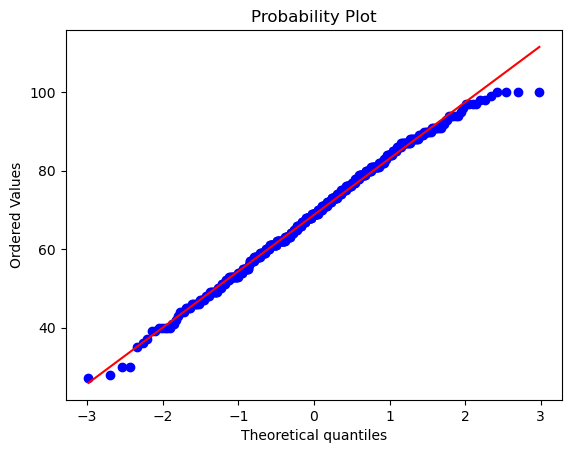

In [64]:
probplot(male_scores['math score'], plot=plt)
plt.show()

### Chebyshev's Theorem

In [118]:
#Chebyshev's Theorem
k = 2
Male_mean = np.mean(male_scores['math score'])
std_dev_math = np.std(male_scores['math score'])


lower_bound = std_dev_math - Male_mean * 2
upper_bound = std_dev_math + Male_mean * 2


print(f"Chebyshev's bounds for k=2: {lower_bound:.2f} - {upper_bound:.2f}")




Chebyshev's bounds for k=2: -123.12 - 151.80


In [220]:
lower_bound = std_dev_math - Male_mean * 3
upper_bound = std_dev_math + Male_mean * 3


print(f"Chebyshev's bounds for k=3: {lower_bound:.2f} - {upper_bound:.2f}")


Chebyshev's bounds for k=3: -191.83 - 220.54


In [221]:
lower_bound = std_dev_math - Male_mean * 4
upper_bound = std_dev_math + Male_mean * 4


print(f"Chebyshev's bounds for k=4: {lower_bound:.2f} - {upper_bound:.2f}")


Chebyshev's bounds for k=4: -260.56 - 289.27


### Empirical formula

In [139]:
# Calculate the mean and standard deviation
mean = np.mean(male_scores['math score'])
std_dev = np.std(male_scores['math score'])

# Calculate empirical rule
lower_bound = mean - std_dev
upper_bound = mean + std_dev

# Print results
print("Lower Bound: ", lower_bound)
print("Upper Bound: ", upper_bound)


Lower Bound:  54.38683870730207
Upper Bound:  83.06959282796763


In [141]:
# Calculate the mean and standard deviation
mean = np.mean(male_scores['math score'])
std_dev = np.std(male_scores['math score'])

# Calculate empirical rule
lower_bound = mean - 2 * std_dev
upper_bound = mean + 2 * std_dev

# Print results
print("Lower Bound: ", lower_bound)
print("Upper Bound: ", upper_bound)

Lower Bound:  40.04546164696929
Upper Bound:  97.41096988830041


In [142]:
# Calculate the mean and standard deviation
mean = np.mean(male_scores['math score'])
std_dev = np.std(male_scores['math score'])

# Calculate empirical rule
lower_bound = mean - 3 * std_dev
upper_bound = mean + 3 * std_dev

# Print results
print("Lower Bound: ", lower_bound)
print("Upper Bound: ", upper_bound)

Lower Bound:  25.70408458663651
Upper Bound:  111.75234694863319


### Outliers

In [230]:
lower_bound = Q1 - 1.5 * Male_IQR
upper_bound = Q3 + 1.5 * Male_IQR
outliers = male_scores[(male_scores["math score"] < lower_bound) | (male_scores["math score"] > upper_bound)]

# Print the outliers
print(outliers)

    gender  math score  reading score  writing score
91    male          27             34             36
327   male          28             23             19


### Covariance

In [253]:
covariance = male_scores['math score'].cov(male_scores['writing score'])
covariance

180.73340464626767

### Correlation Coefficient

In [260]:
male_scores.corr()

C:\Users\lebes\AppData\Local\Temp\ipykernel_2452\47230457.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  male_scores.corr()


,math score,reading score,writing score
math score,1.000000,0.885489,0.891973
reading score,0.885489,1.000000,0.950627
writing score,0.891973,0.950627,1.000000


C:\Users\lebes\AppData\Local\Temp\ipykernel_2452\609070935.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(male_scores.corr(), annot=True, cmap='coolwarm')


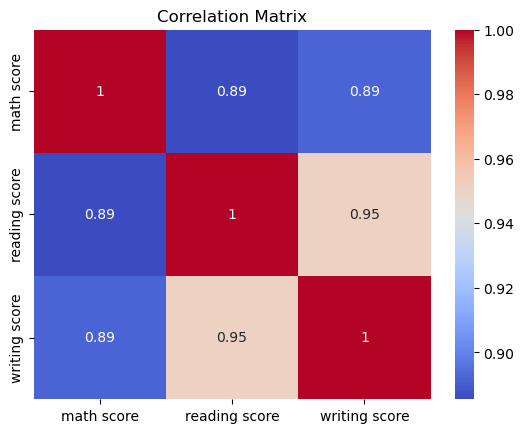

In [138]:
sns.heatmap(male_scores.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

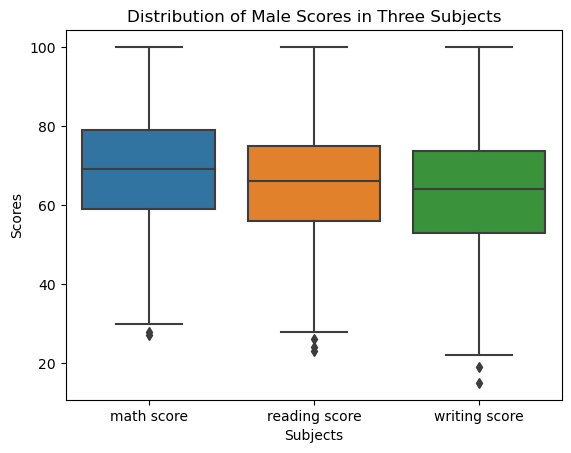

In [258]:
sns.boxplot(data=male_scores[['math score', 'reading score', 'writing score']])
plt.xlabel('Subjects')
plt.ylabel('Scores')
plt.title('Distribution of Male Scores in Three Subjects')
plt.show()

array([[<Axes: title={'center': 'math score'}>,
        <Axes: title={'center': 'reading score'}>],
       [<Axes: title={'center': 'writing score'}>, <Axes: >]],
      dtype=object)

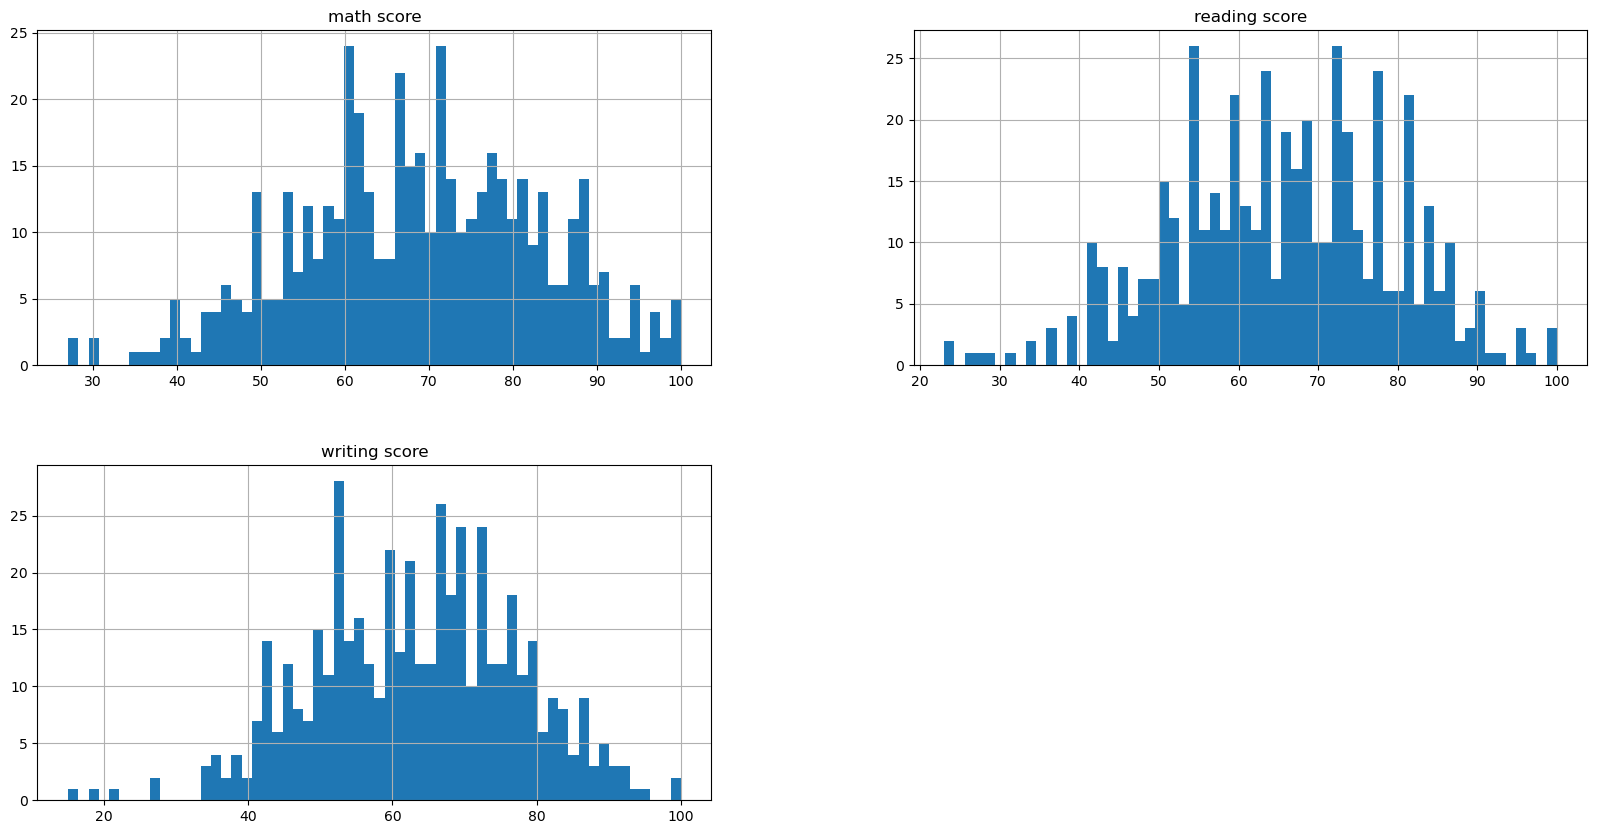

In [125]:
male_scores.hist(bins=60, figsize=(20,10))

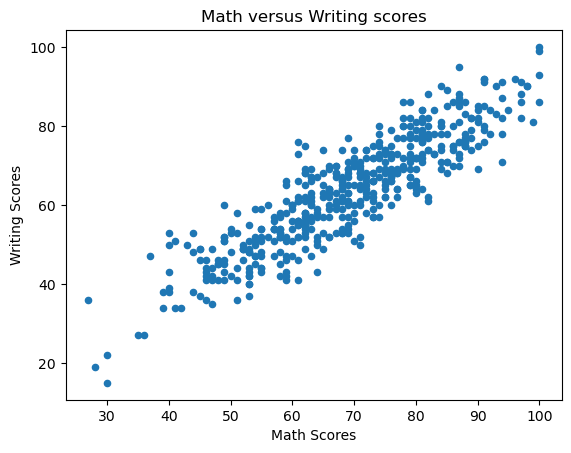

In [131]:
male_scores.plot.scatter(x='math score', y='writing score')
plt.xlabel('Math Scores')
plt.ylabel('Writing Scores')
plt.title('Math versus Writing scores')
plt.show()

# Descriptive Statistics for female Students

In [26]:
Female_scores = StudentsPerformance.loc[StudentsPerformance['gender'] == 'female',['gender','math score', 'reading score', 'writing score']]
Female_scores.head()

,gender,math score,reading score,writing score
0,female,72,72,74
1,female,69,90,88
2,female,90,95,93
5,female,71,83,78
6,female,88,95,92


### Mean scores

In [184]:
Female_scores[['math score','reading score', 'writing score']].mean()

math score       63.633205
reading score    72.608108
writing score    72.467181
dtype: float64

|Score Type    | Mean Result |
|--------------|-------------|
|math score    | 63.633205   |
|reading score | 72.608108   |
|writing score | 72.467181   |

### Median scores

In [185]:
Female_scores[['math score','reading score', 'writing score']].median()

math score       65.0
reading score    73.0
writing score    74.0
dtype: float64

|Score Type    | Median Result |
|--------------|---------------|
|math score    | 65.0          |
|reading score | 73.0          |
|writing score | 74.0          |

### Mode scores

In [186]:
Female_scores[['math score','reading score', 'writing score']].mode()

,math score,reading score,writing score
0,65,72,70


### Weighted Mean

In [27]:
weighted_mean = np.average(Female_scores['math score'], weights= Female_scores['writing score'])
print("Weighted mean:", weighted_mean)

Weighted mean: 66.5494165911876


### Geometric mean

In [188]:
gmean(Female_scores[['math score', 'reading score', 'writing score']])

array([ 0.        , 70.98147771, 70.64296879])

|Score Type   |Geometric mean|
|-------------|--------------|
|math score   |0             |
|reading score|70.98147771   |
|writing score|70.64296879   |

### Percentiles

In [189]:
np.percentile(Female_scores['math score'],[0,25,50,75,99])

array([ 0.  , 54.  , 65.  , 74.  , 97.83])

|Percentiles | Percentile_Outcome |
|----------- | ------------------ |
| P0         | 0  |
| P25        | 54 |
| P50        | 65 |
| P75        | 74 |
| P99        | 97.83|

In [190]:
np.percentile(Female_scores['reading score'],[0,25,50,75,99])

array([ 17.  ,  63.25,  73.  ,  83.  , 100.  ])

|Percentiles | Percentile_Outcome |
|----------- | ------------------ |
| P0         | 17 |
| P25        | 63.25 |
| P50        | 73 |
| P75        | 83 |
| P99        | 100|

In [191]:
np.percentile(Female_scores['writing score'],[0,25,50,75,99])

array([ 10.,  64.,  74.,  82., 100.])

|Percentiles | Percentile_Outcome |
|----------- | ------------------ |
| P0         | 10 |
| P25        | 64 |
| P50        | 74 |
| P75        | 82 |
| P99        | 100|

### Quartiles

In [82]:
#Female_scores['math score'].quantile(0.25)
#Female_scores['math score'].quantile(0.5)
#Female_scores['math score'].quantile(0.75)
#Female_scores['math score'].min()
Female_scores['math score'].max()


100

|Quartile    | Results    |
|----------- | -----------|
| Minimum    | 0          |
| P25        | 54         |
| P50        | 65         |
| P75        | 74         |
| Maximum    | 100        |

In [87]:
Female_scores['reading score'].quantile(0.25)
#Female_scores['reading score'].quantile(0.50)
#Female_scores['reading score'].quantile(0.75)
#Female_scores['reading score'].min()
#Female_scores['reading score'].max()


63.25

|Quartile    | Results    |
|----------- | -----------|
| Minimum    | 17         |
| P25        | 63.25         |
| P50        | 73         |
| P75        | 83         |
| Maximum    | 100        |

In [92]:
Female_scores['writing score'].quantile(0.25)
#Female_scores['writing score'].quantile(0.55)
#Female_scores['writing score'].quantile(0.75)
#Female_scores['writing score'].min()
#Female_scores['writing score'].max()


64.0

|Quartile    | Results    |
|----------- | -----------|
| Minimum    | 10         |
| P25        | 64         |
| P50        | 75         |
| P75        | 82         |
| Maximum    | 100        |

### Range

In [195]:
Female_scores['math score'].max() - Female_scores['math score'].min()

100

In [196]:
Female_scores['math score'].max() - Female_scores['math score'].min()

100

In [197]:
Female_scores['math score'].max() - Female_scores['math score'].min()

100

### Interquartile range

In [233]:
Q1 = Female_scores['math score'].quantile(0.25)
Q3 = Female_scores['math score'].quantile(0.75)
IQR = Q3 - Q1
print('Interquartile Range (IQR) for Math Scores:', IQR)

Interquartile Range (IQR) for Math Scores: 20.0


In [234]:
Q1 = Female_scores['reading score'].quantile(0.25)
Q3 = Female_scores['reading score'].quantile(0.75)
IQR = Q3 - Q1
print('Interquartile Range (IQR) for Reading Scores:', IQR)

Interquartile Range (IQR) for Reading Scores: 19.75


In [200]:
Q1 = Female_scores['writing score'].quantile(0.25)
Q3 = Female_scores['writing score'].quantile(0.75)
IQR = Q3 - Q1
print('Interquartile Range (IQR) for Writing Scores:', IQR)

Interquartile Range (IQR) for Writing Scores: 18.0


### Variance

In [94]:
np.var(Female_scores['math score'])
#np.var(Female_scores['reading score'])
#np.var(Female_scores['writing score'])

239.52183181526837

|Score_type   | Variance result |
|----------   | ----------------|
|math score   |239.52183181526837|
|reading score|206.33483773348664|
|writing score|219.9439036388841 |

### Standard Deviation

In [96]:
np.std(Female_scores['math score'])
#np.std(Female_scores['reading score'])
#np.std(Female_scores['writing score'])

15.47649287840331

|Score_type   | Standard deviation result |
|----------   | ------------------------- |
|math score   | 15.47649287840331         |
|reading score| 14.364359983427269        |
|writing score| 14.830505845684566        |

### Coefficient of Variance

In [98]:

np.std(Female_scores['math score'])/ np.var(Female_scores['math score'])*100
#np.std(Female_scores['reading score'])/ np.var(Female_scores['reading score'])*100
#np.std(Female_scores['writing score'])/ np.var(Female_scores['writing score'])*100


6.461412206608198

|Score_Type   | Coefficient of variance |
|-------------|-------------------------|
|math score   |6.461412206608198        |
|reading score|6.9616745970843095       |
|writing score|6.742858338112476        |

### Z scores

In [207]:
zscore(Female_scores['math score'])

0      0.540613
1      0.346771
2      1.703667
5      0.475999
6      1.574439
         ...   
993   -0.105528
995    1.574439
997   -0.299370
998    0.282157
999    0.863684
Name: math score, Length: 518, dtype: float64

|   | Zscores |
|---|---------|
|0  |0.540613 |
|1  |0.346771 | 
|2  |1.703667 |
|5  |0.475999 |
|6  |1.574439 |
|   |...      |
|993|-0.105528|
|995|1.574439 |
|997|-0.299370|
|998|0.282157 |
|999|0.863684 |

### Kurtosis

In [208]:
Female_scores['math score'].kurtosis()

0.5878741856936318

In [209]:
Female_scores['math score'].skew()

-0.3319983022808976

## QQ plot

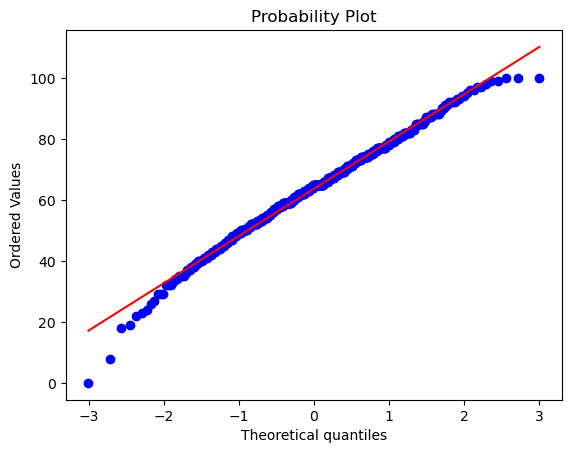

In [65]:
probplot(Female_scores['math score'], plot=plt)
plt.show()

### Chebyshev's Theorem

In [119]:
#Chebyshev's Theorem
k = 2
mean = np.mean(Female_scores['math score'])
std_dev_math = np.std(Female_scores['math score'])

lower_bound = std_dev_math - mean * 2
upper_bound = std_dev_math + mean * 2


print(f"Chebyshev's bounds for k=2: {lower_bound:.2f} - {upper_bound:.2f}")



Chebyshev's bounds for k=2: -111.79 - 142.74


In [120]:
lower_bound = std_dev_math - mean * 3
upper_bound = std_dev_math + mean * 3


print(f"Chebyshev's bounds for k=3: {lower_bound:.2f} - {upper_bound:.2f}")

Chebyshev's bounds for k=3: -175.42 - 206.38


In [121]:
lower_bound = std_dev_math - mean * 4
upper_bound = std_dev_math + mean * 4


print(f"Chebyshev's bounds for k=4: {lower_bound:.2f} - {upper_bound:.2f}")

Chebyshev's bounds for k=4: -239.06 - 270.01


### Empirical Rule


In [136]:
# Calculate the mean and standard deviation
mean = np.mean(Female_scores['math score'])
std_dev = np.std(Female_scores['math score'])

# Calculate empirical rule
lower_bound = mean - std_dev
upper_bound = mean + std_dev

# Print results
print(f"Chebyshev's bounds for k=4:,Lower Bound: ", lower_bound)
print("Upper Bound: ", upper_bound)

Lower Bound:  48.15671175480132
Upper Bound:  79.10969751160795


In [137]:
# Calculate empirical rule
lower_bound = mean - 2 * std_dev
upper_bound = mean + 2 * std_dev

# Print results
print("Lower Bound: ", lower_bound)
print("Upper Bound: ", upper_bound)

Lower Bound:  32.680218876398015
Upper Bound:  94.58619039001125


In [138]:
# Calculate empirical rule
lower_bound = mean - 3 * std_dev
upper_bound = mean + 3 * std_dev

# Print results
print("Lower Bound: ", lower_bound)
print("Upper Bound: ", upper_bound)

Lower Bound:  17.203725997994702
Upper Bound:  110.06268326841456


### Outliers

In [243]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = Female_scores[(Female_scores["math score"] < lower_bound) | (Female_scores["math score"] > upper_bound)]

# Print the outliers
print(outliers)

     gender  math score  reading score  writing score
17   female          18             32             28
59   female           0             17             10
787  female          19             38             32
980  female           8             24             23


### Covariance

In [252]:
covariance = Female_scores['math score'].cov(Female_scores['writing score'])
covariance

211.7384225894864

### Correlation Corfficient

C:\Users\lebes\AppData\Local\Temp\ipykernel_2452\3809823485.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Female_scores.corr(), annot=True, cmap='coolwarm')


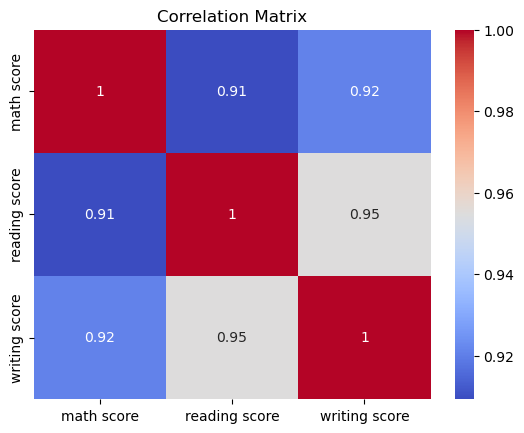

In [261]:
sns.heatmap(Female_scores.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

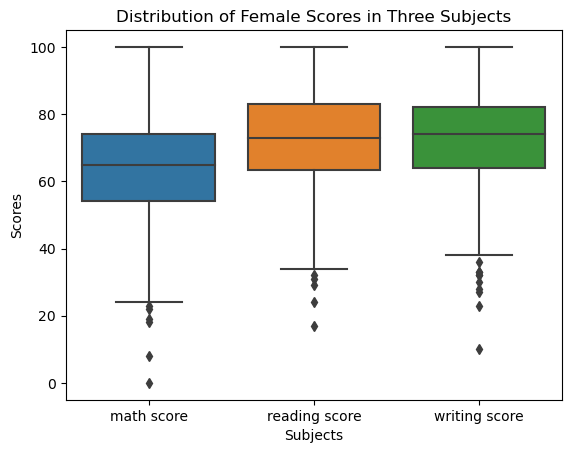

In [244]:
sns.boxplot(data=Female_scores[['math score', 'reading score', 'writing score']])
plt.xlabel('Subjects')
plt.ylabel('Scores')
plt.title('Distribution of Female Scores in Three Subjects')
plt.show()

array([[<Axes: title={'center': 'math score'}>,
        <Axes: title={'center': 'reading score'}>],
       [<Axes: title={'center': 'writing score'}>, <Axes: >]],
      dtype=object)

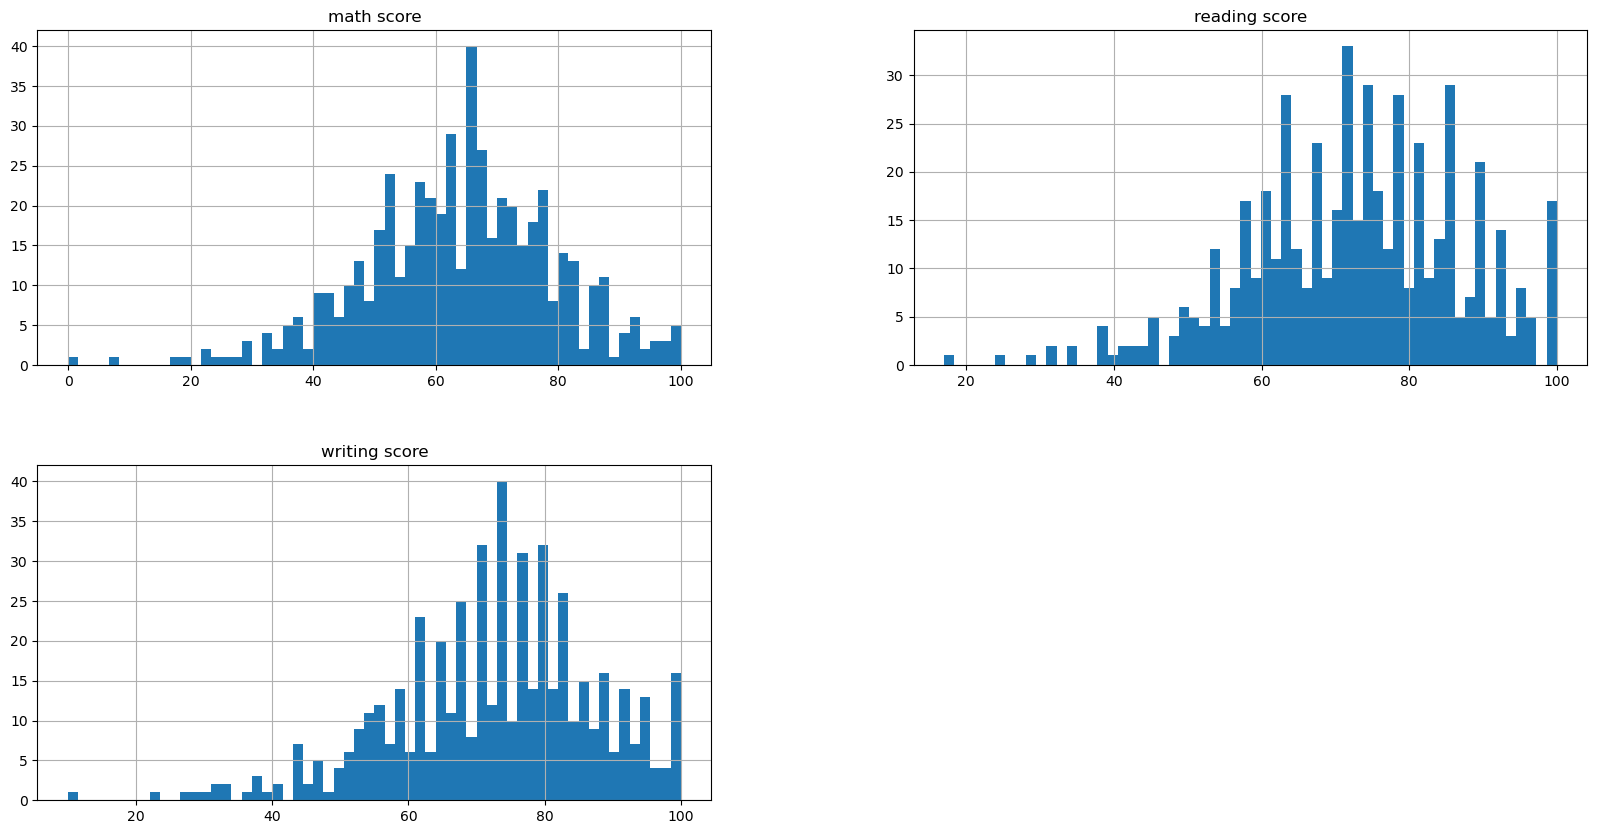

In [245]:
Female_scores.hist(bins=60, figsize=(20,10))

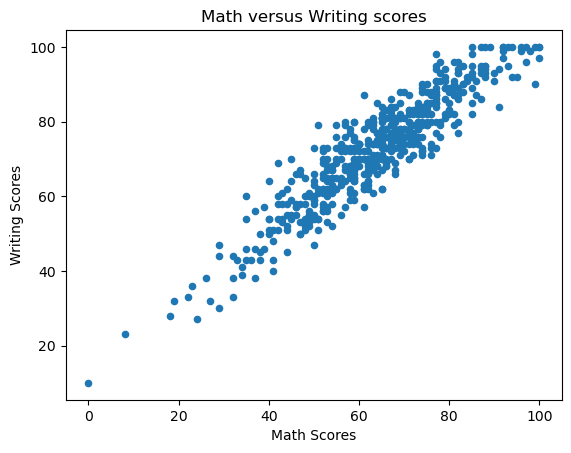

In [246]:
Female_scores.plot.scatter(x='math score', y='writing score')
plt.xlabel('Math Scores')
plt.ylabel('Writing Scores')
plt.title('Math versus Writing scores')
plt.show()

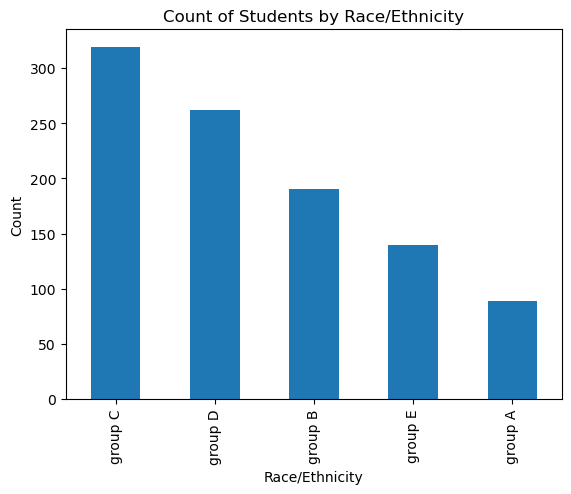

In [136]:
StudentsPerformance['race/ethnicity'].value_counts().plot(kind='bar')
plt.title('Count of Students by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Count')
plt.show()

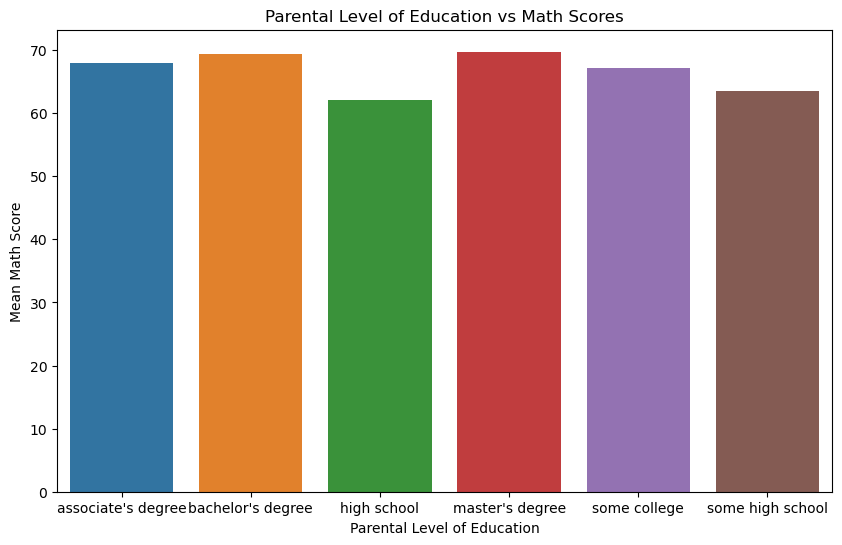

In [249]:
parental_edu_math_mean = StudentsPerformance.groupby('parental level of education')['math score'].mean()

# Create a bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=parental_edu_math_mean.index, y=parental_edu_math_mean.values)
plt.xlabel('Parental Level of Education')
plt.ylabel('Mean Math Score')
plt.title('Parental Level of Education vs Math Scores')
plt.show()

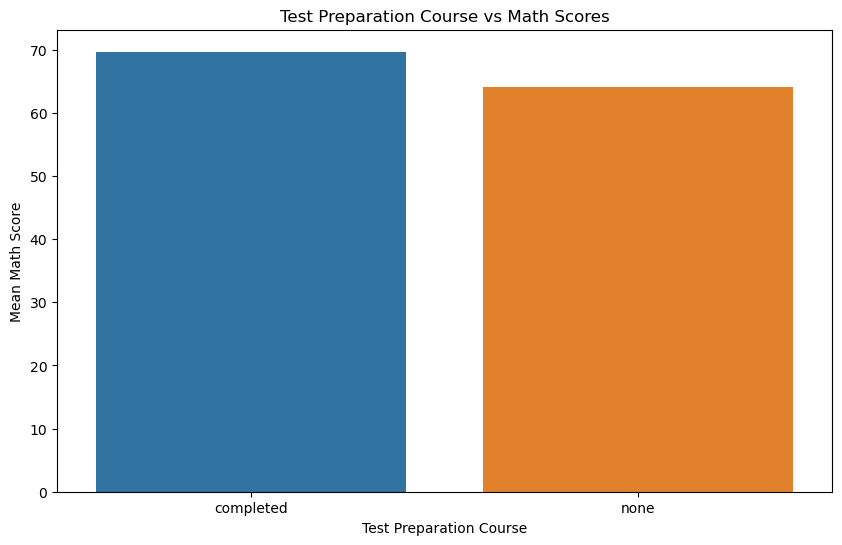

In [102]:
test_prep_math_mean = StudentsPerformance.groupby('test preparation course')['math score'].mean()

# Create a bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=test_prep_math_mean.index, y=test_prep_math_mean.values)
plt.xlabel('Test Preparation Course')
plt.ylabel('Mean Math Score')
plt.title('Test Preparation Course vs Math Scores')
plt.show()

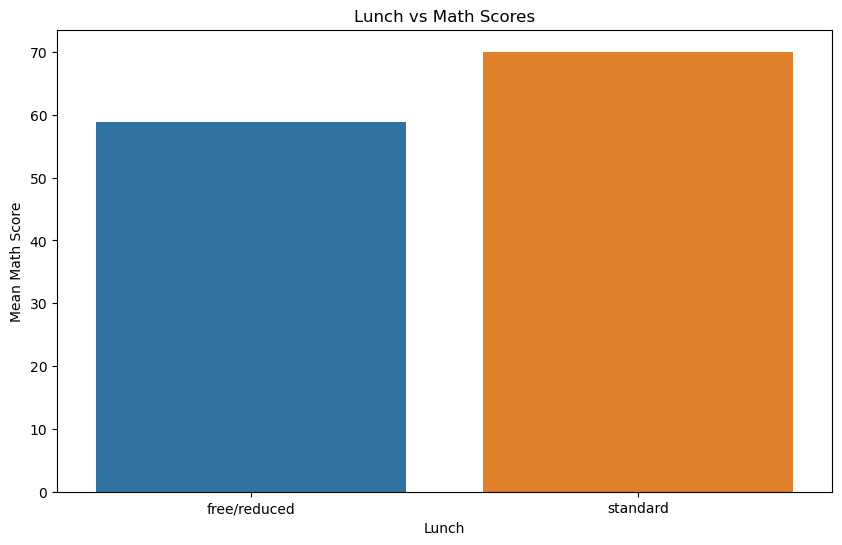

In [104]:
lunch_math_mean = StudentsPerformance.groupby('lunch')['math score'].mean()

# Create a bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=lunch_math_mean.index, y=lunch_math_mean.values)
plt.xlabel('Lunch')
plt.ylabel('Mean Math Score')
plt.title('Lunch vs Math Scores')
plt.show()

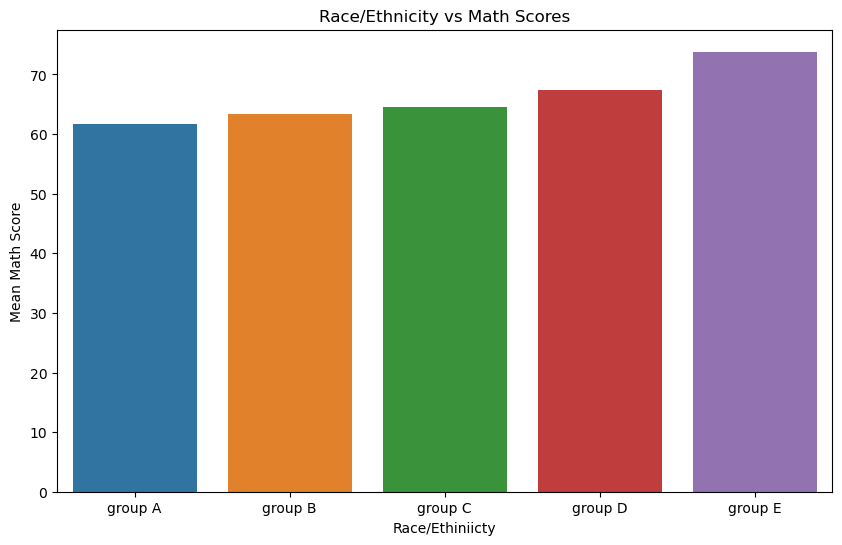

In [105]:
ethinicity_math_mean = StudentsPerformance.groupby('race/ethnicity')['math score'].mean()

# Create a bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=ethinicity_math_mean.index, y=ethinicity_math_mean.values)
plt.xlabel('Race/Ethiniicty')
plt.ylabel('Mean Math Score')
plt.title('Race/Ethnicity vs Math Scores')
plt.show()

## Conclusions on the dataset

- From the dataset we can conclude that students who have a masters and bachelors degree have higher math marks than students whose parents do not have formal education.
- Students who completed the test preparation course have higher math marks than those who did not complete it.
- Students who get a standard lunch have higher math marks than those who get a reduced/free lunch.
- Students from who have the ethinicity group E have higher marks than the other ethinicities.
- I can conclude that ethinicity, the ability to afford better lunch, and having a parent with some form of degree inlfuences the student to get better marks.

## Additional Statistics

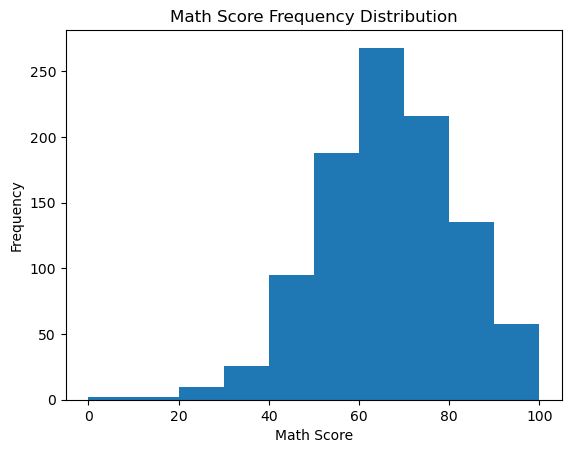

In [8]:
plt.hist(StudentsPerformance["math score"], bins=10)
plt.xlabel("Math Score")
plt.ylabel("Frequency")
plt.title("Math Score Frequency Distribution")
plt.show()

### Gini Coefficient

In [9]:
# Sort the data in ascending order
data_sorted = np.sort(StudentsPerformance['math score'])

# Calculate the cumulative sum of the data
cumsum_data = np.cumsum(data_sorted)

# Calculate the Lorenz curve
lorenz_curve = cumsum_data / cumsum_data[-1]

# Calculate the area between the Lorenz curve and the line of perfect equality
area_lorenz = np.trapz(y=lorenz_curve, x=np.linspace(0, 1, len(data_sorted)))

# Calculate the total area below the line of perfect equality
area_perfect = 0.5

# Calculate the Gini coefficient
gini_coefficient = (area_perfect - area_lorenz) / area_perfect

print("Gini coefficient:", gini_coefficient)

Gini coefficient: 0.12802404304772308


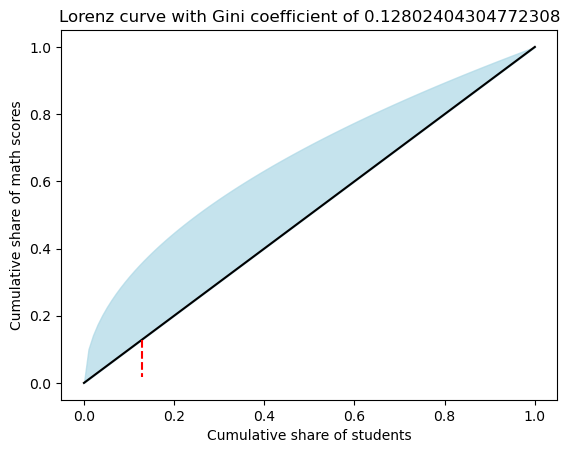

In [11]:
gini = 0.12802404304772308 # Replace with your own Gini coefficient
x = np.linspace(0, 1, 100) # Evenly spaced values between 0 and 1
y = x # The diagonal line represents perfect equality

# Create Lorenz curve
plt.plot(x, y, color='black') # Add diagonal line
plt.fill_between(x, x, np.sqrt(x), color='lightblue', alpha=0.7) # Add shaded area
plt.plot([gini, gini], [gini, gini**2], color='red', linestyle='--') # Add Gini coefficient line

# Add labels and titles
plt.xlabel('Cumulative share of students')
plt.ylabel('Cumulative share of math scores')
plt.title('Lorenz curve with Gini coefficient of {}'.format(gini))

# Show plot
plt.show()

### Shannon Entropy

In [67]:
parental_edu_counts = StudentsPerformance['parental level of education'].value_counts()
parental_edu_entropy = entropy(parental_edu_counts)
print("Shannon entropy of parental level of education:", parental_edu_entropy)

Shannon entropy of parental level of education: 1.716751963038892


### Quantile Regression

In [42]:
# Set the predictor variable
X = StudentsPerformance['reading score']

# Set the response variable
y = StudentsPerformance['math score']

# Define the quantiles
quantiles = [0.25, 0.5, 0.75]

# Perform quantile regression
quant_reg = [sm.QuantReg(y, sm.add_constant(X)).fit(q=q) for q in quantiles]

# Print the coefficients for each quantile
for i in range(len(quantiles)):
    print('Quantile:', quantiles[i])
    print('Coefficients:', quant_reg[i].params)
    print('')



Quantile: 0.25
Coefficients: const           -1.090913
reading score    0.878788
dtype: float64

Quantile: 0.5
Coefficients: const            8.500001
reading score    0.833333
dtype: float64

Quantile: 0.75
Coefficients: const            14.833400
reading score     0.833332
dtype: float64



### Harmonic mean

In [70]:
# Calculate harmonic mean
hmean = statistics.harmonic_mean(StudentsPerformance['reading score'])

# Print result
print("Harmonic Mean: ", hmean)

Harmonic Mean:  65.45934760893233


### Median absolute deviation

In [51]:
# calculate median absolute deviation
mad = np.median(np.abs(StudentsPerformance['math score'] - np.median(StudentsPerformance['math score'])))

print(mad)

10.0


### Winsorized mean

In [72]:
# Winsorize the data 
wins_data = mstats.winsorize(StudentsPerformance['math score'], limits=[0.1, 0.1])

# Calculate the winsorized mean
wins_mean = np.mean(wins_data)

print(wins_mean)

66.402


### Goodness of fit

In [74]:
# Test if the data follows a normal distribution
statistic, p_value = kstest(StudentsPerformance['reading score'], 'norm')

print(f"KS-statistic: {statistic}, p-value: {p_value}")

KS-statistic: 1.0, p-value: 0.0


## Reflections


1. I feel like excel was a little bit complicated as it is a spreadsheet tool and for it to be easier, you had to get into the habit. Excel was more limited to what I could do.In comparison to Excel, Python offered me more capability, scalability, customisation, and flexibility. NumPy, Pandas, and SciPy are just a few of the statistical and data analysis packages in Python that offer more sophisticated statistical methods and modeling capabilities while excel works primarily well as a data management tool. 
2. Excel and Python are two effective programs for modeling and data analysis. Excel works better with smaller datasets and easier analysis, such generating charts and graphs and computing basic descriptive statistics. Larger datasets, more intricate analyses, and the automation of data analysis operations are all better suited for Python.
3. If I could do the assignment differently, I would maybe choose a dataset that is a little bit complicated so that I can get familiar with data cleaning or have more things to clean out of the dataset. This dataset in particular had no missing values or any duplications, so it was too clean which just did not show more steps on how I would go about making the data clean.
4. While completing this assignment, I had trouble with calculating quantile regression and I feel like regression in general is something that I have not as yet figured out and I am still learning how to. I also trying calculating Lmoments, but I had to first install it on the terminal and I could not do it and thus feel like my knowldege on the command prompt is also limited and is something I need to practice more.